In [0]:
!unzip -uq "/content/drive/My Drive/DITS-full.zip" -d "/content/drive/My Drive/"

In [0]:
!cp -r "/content/drive/My Drive/DITS-full/DITS-classification" "/content"

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.utils import np_utils
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# dimensions of our images.
img_width, img_height = 32, 32

train_data_dir = '/content/DITS-classification/classification train'
validation_data_dir = '/content/DITS-classification/classification test'
nb_train_samples = 7489
nb_validation_samples = 1159
epochs = 50
batch_size = 128

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(59))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    shuffle = True,
    target_size=(img_width, img_height),
    batch_size=1159,
    class_mode='categorical')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save('/content/DITS-classification/first_try.h5')

Found 7489 images belonging to 59 classes.
Found 1159 images belonging to 59 classes.
Epoch 1/50
58/58 [==============================] - 28s 484ms/step - loss: 3.5351 - accuracy: 0.1282 - val_loss: 3.5279 - val_accuracy: 0.1803
Epoch 2/50
58/58 [==============================] - 28s 476ms/step - loss: 2.9962 - accuracy: 0.2269 - val_loss: 3.2029 - val_accuracy: 0.2485
Epoch 3/50
58/58 [==============================] - 28s 481ms/step - loss: 2.5192 - accuracy: 0.3417 - val_loss: 2.9634 - val_accuracy: 0.2899
Epoch 4/50
58/58 [==============================] - 28s 476ms/step - loss: 2.2065 - accuracy: 0.4093 - val_loss: 2.6488 - val_accuracy: 0.3296
Epoch 5/50
58/58 [==============================] - 28s 478ms/step - loss: 1.9710 - accuracy: 0.4637 - val_loss: 2.4129 - val_accuracy: 0.3745
Epoch 6/50
58/58 [==============================] - 28s 480ms/step - loss: 1.7778 - accuracy: 0.5043 - val_loss: 2.3646 - val_accuracy: 0.3840
Epoch 7/50
58/58 [==============================] - 28s 

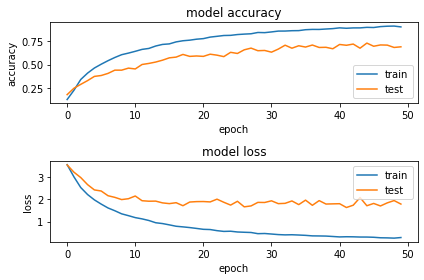

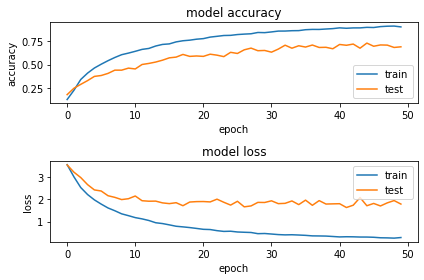

In [15]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [22]:
from keras.models import load_model
model = load_model("/content/DITS-classification/first_try.h5")
loss_and_metrics = model.evaluate(validation_generator)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

1/1 [==============================] - 1s 1s/step
Test Loss 1.7817888259887695
Test Accuracy 0.6893873810768127



799  classified correctly
360  classified incorrectly


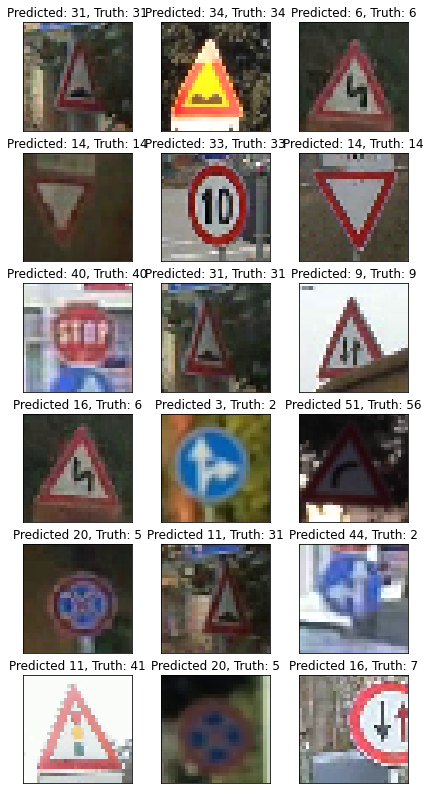

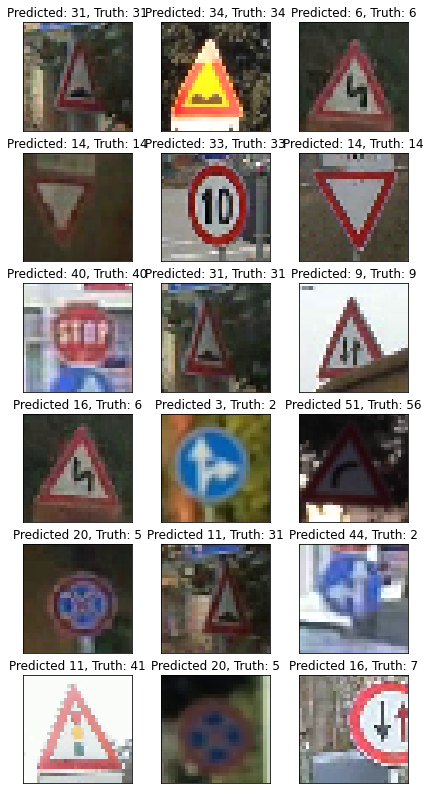

In [24]:
X_test, Y_test = validation_generator[0][0], validation_generator[0][1]
predicted_classes = model.predict_classes(X_test)

y_test = np.empty(len(Y_test), dtype = int)
for i in range(len(Y_test)):
  y_test[i] = (np.where(Y_test[i] == 1)[0][0])

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct], interpolation='none')
    plt.title("Predicted: {}, Truth: {}".format(predicted_classes[correct], y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect], interpolation='none')
    plt.title("Predicted {}, Truth: {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation